[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/owenbean/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


171


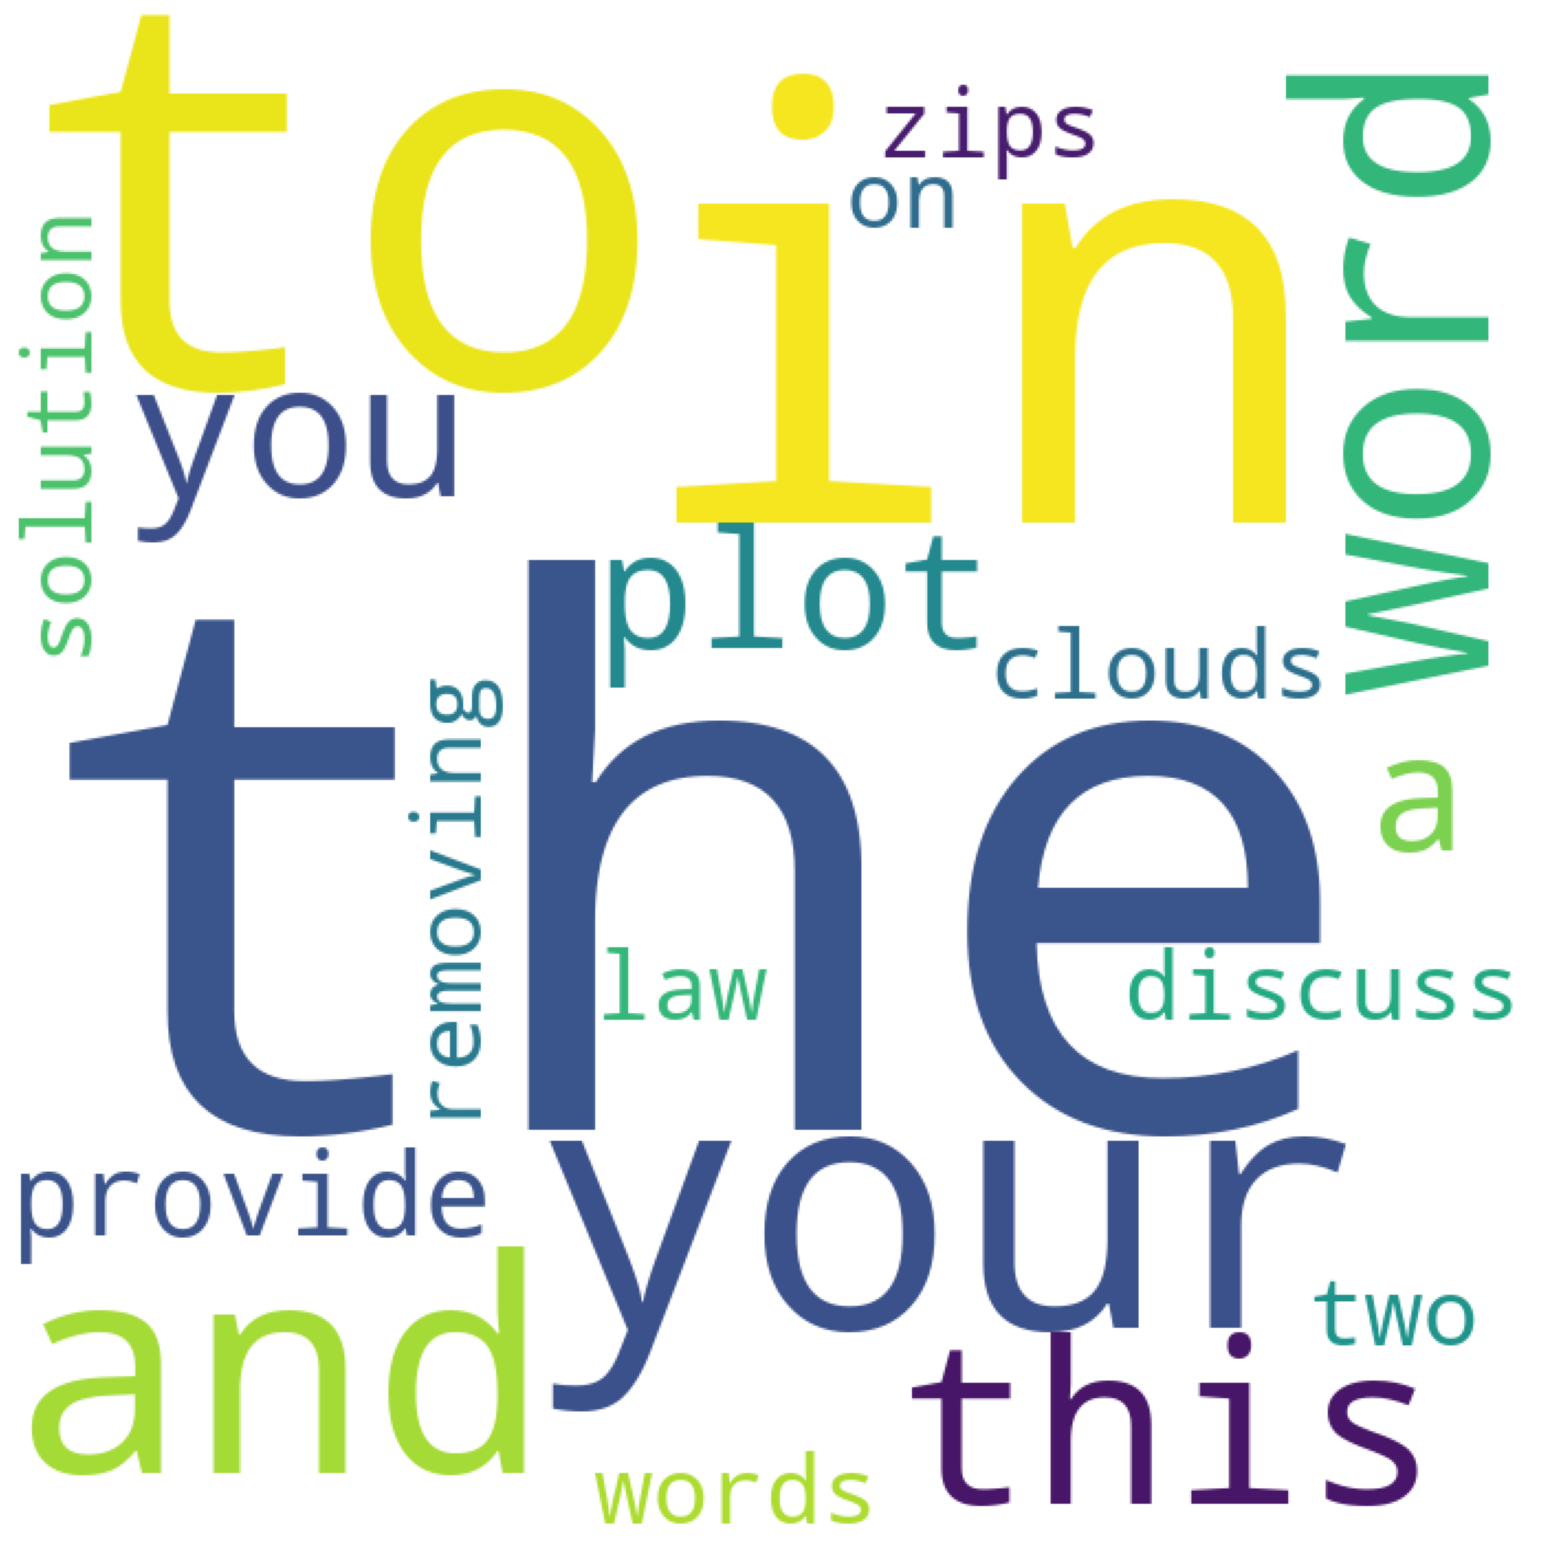

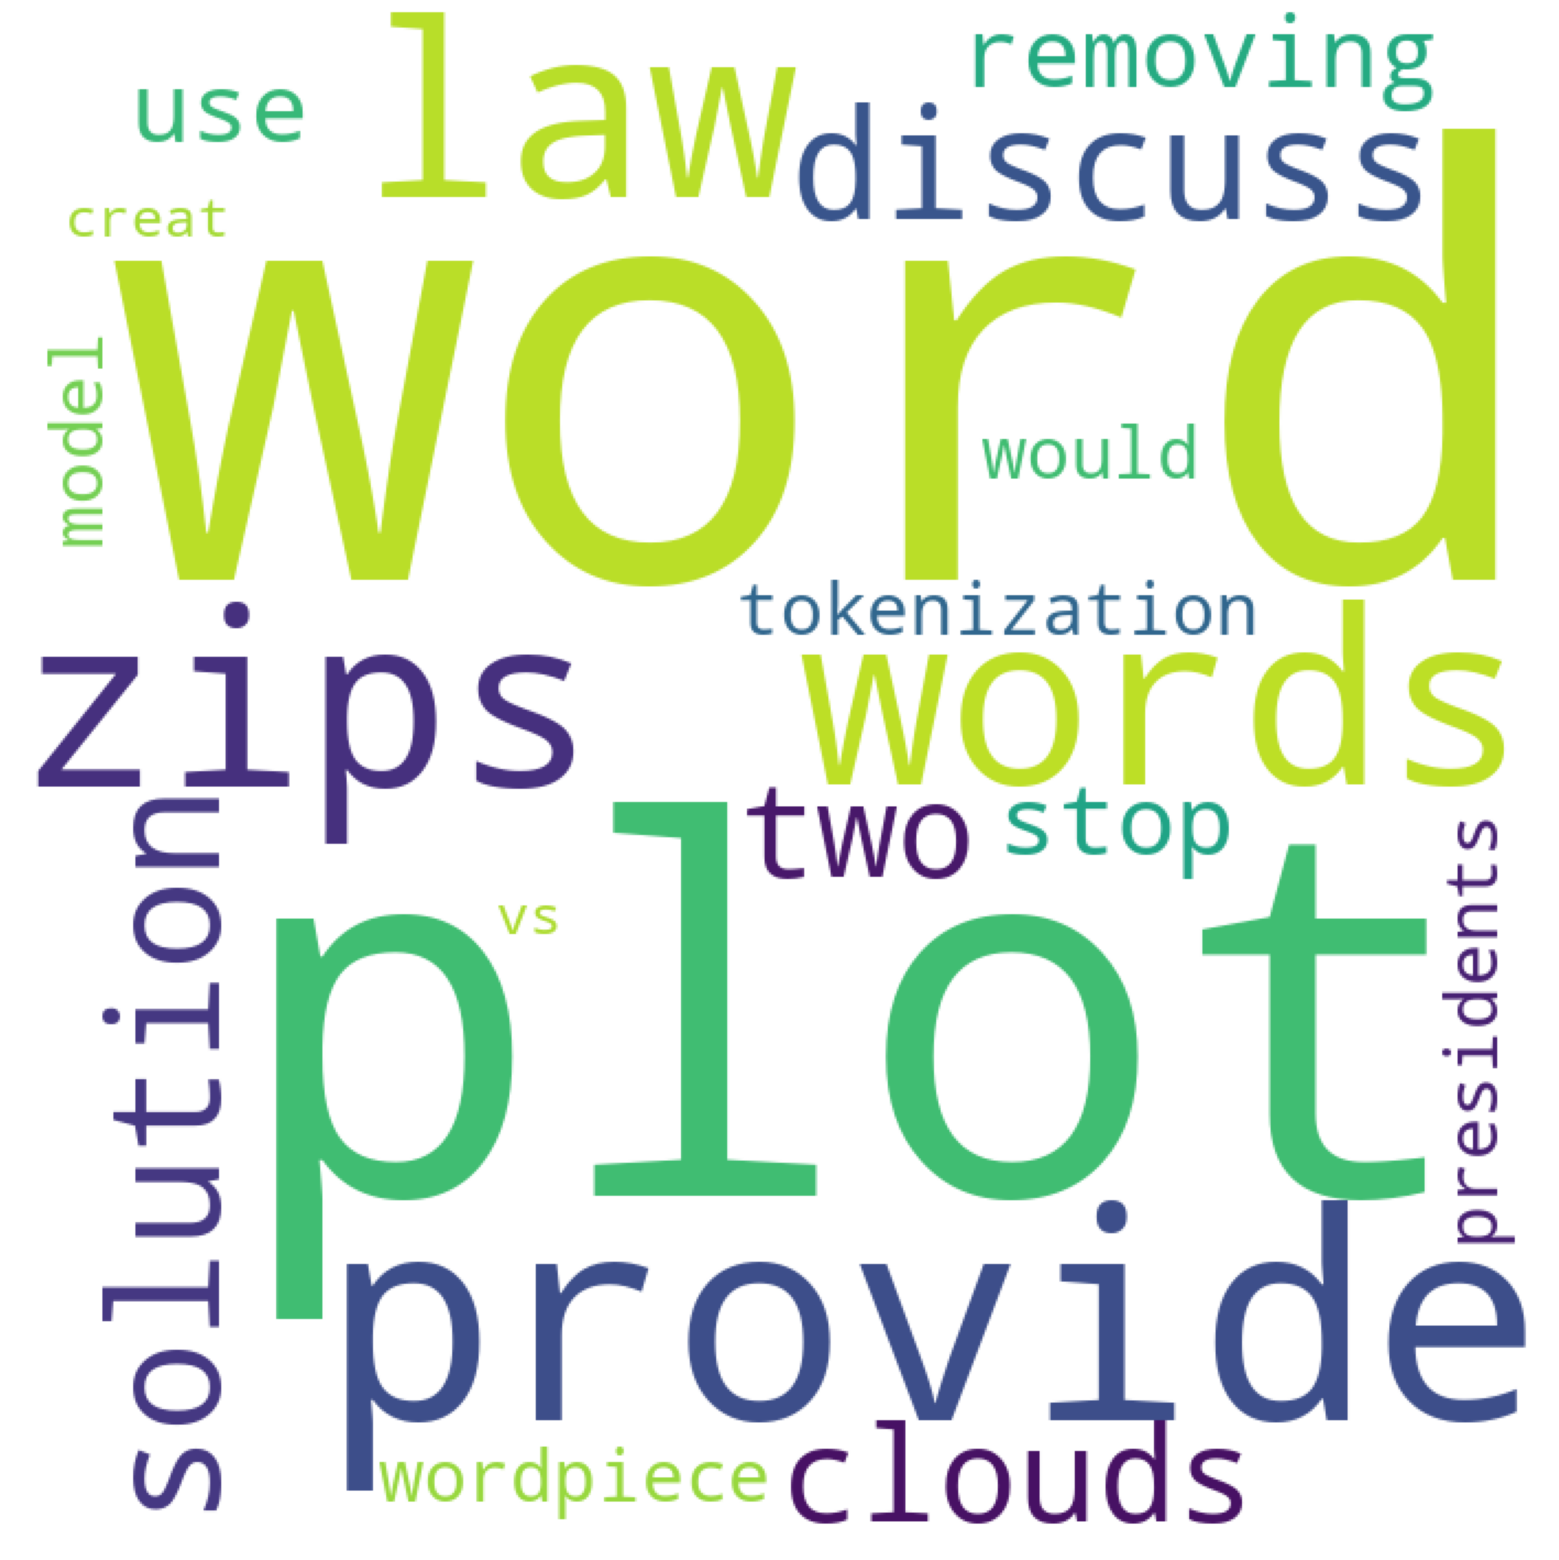

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

badCharacters = [".", "'", ":", "(", ")", "?"]
stopwords = set(stopwords.words('english')) 
string = ""
depth = 20

with open("Questions.txt", "r+") as file:
    string = file.read()

string = string.lower()

for character in badCharacters:
    string = string.replace(character, "")

words = string.split()

print(len(words))

wordDictionary = {}
wordDictionaryNoStopWords = {}

for word in words:
    if word in wordDictionary.keys():
        wordDictionary[word] += 1
    else:
        wordDictionary[word] = 1
    if word not in stopwords:
        if word in wordDictionaryNoStopWords.keys():
            wordDictionaryNoStopWords[word] += 1
        else:
            wordDictionaryNoStopWords[word] = 1

sortedWordDictionary = dict(sorted(wordDictionary.items(), key=lambda item: item[1], reverse=True)[0:depth])
sortedWordDictionaryNoStopWords = dict(sorted(wordDictionaryNoStopWords.items(), key=lambda item: item[1], reverse=True)[0:depth])


wordcloud = WordCloud(width=700, height=700, background_color ='white',
                        min_font_size = 14).generate_from_frequencies(sortedWordDictionary)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud = WordCloud(width=700, height=700, background_color ='white',
                        min_font_size = 14).generate_from_frequencies(sortedWordDictionaryNoStopWords)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()